In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, GlobalAveragePooling2D, SeparableConv2D,\
ZeroPadding2D, Convolution2D, ZeroPadding2D, Conv2DTranspose,ReLU, UpSampling2D, Concatenate, Conv2DTranspose


# Data Preprocessing 

In [2]:
batch_size = 8
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '../input/face-image-data/',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode="input"
    )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
    '../input/face-image-data/',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode="input"
    )


Found 1554 images belonging to 1 classes.
Found 1554 images belonging to 1 classes.


# Auto-Encoder Construction

In [3]:
# ENCODER
input_img = Input(shape=(256, 256, 3))  
x = Conv2D(48, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(32, (1, 1), activation='relu', padding='same')(x)

# Bottolneck
latentSize = (32,32,32)

# DECODER
direct_input = Input(shape=latentSize)
x = Conv2D(192, (1, 1), activation='relu', padding='same')(direct_input)
x = UpSampling2D((2, 2))(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(48, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same')(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# COMPILE
encoder = Model(input_img, encoded)
decoder = Model(direct_input, decoded)
autoencoder = Model(input_img, decoder(encoded))

2022-12-15 14:42:57.236838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 14:42:57.237790: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 14:42:57.398102: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 14:42:57.398990: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 14:42:57.399856: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [4]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 48)      1344      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 48)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 96)      41568     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 192)       166080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 192)       0   

In [5]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

In [6]:
story = autoencoder.fit_generator(train_generator,
        epochs = 50, verbose=2)
autoencoder.save("auto_20epoch.h5")

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-12-15 14:43:01.466285: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-12-15 14:43:03.541331: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


195/195 - 51s - loss: 0.5285
Epoch 2/50
195/195 - 37s - loss: 0.4966
Epoch 3/50
195/195 - 38s - loss: 0.4934
Epoch 4/50
195/195 - 37s - loss: 0.4910
Epoch 5/50
195/195 - 38s - loss: 0.4880
Epoch 6/50
195/195 - 37s - loss: 0.4875
Epoch 7/50
195/195 - 37s - loss: 0.4855
Epoch 8/50
195/195 - 38s - loss: 0.4849
Epoch 9/50
195/195 - 37s - loss: 0.4848
Epoch 10/50
195/195 - 37s - loss: 0.4842
Epoch 11/50
195/195 - 37s - loss: 0.4844
Epoch 12/50
195/195 - 37s - loss: 0.4830
Epoch 13/50
195/195 - 37s - loss: 0.4838
Epoch 14/50
195/195 - 37s - loss: 0.4835
Epoch 15/50
195/195 - 37s - loss: 0.4824
Epoch 16/50
195/195 - 37s - loss: 0.4823
Epoch 17/50
195/195 - 37s - loss: 0.4820
Epoch 18/50
195/195 - 37s - loss: 0.4824
Epoch 19/50
195/195 - 37s - loss: 0.4818
Epoch 20/50
195/195 - 37s - loss: 0.4818
Epoch 21/50
195/195 - 37s - loss: 0.4821
Epoch 22/50
195/195 - 37s - loss: 0.4817
Epoch 23/50
195/195 - 37s - loss: 0.4824
Epoch 24/50
195/195 - 37s - loss: 0.4806
Epoch 25/50
195/195 - 37s - loss: 0.

In [7]:
encoder.save("encoder_20epoch.h5")
decoder.save("decoder_20epoch.h5")

# Encoding

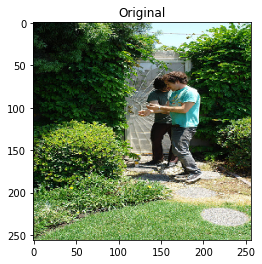

In [8]:
# any image
orig = cv2.imread("/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/1000092795.jpg") 
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
orig=orig* 1.0 / 255.0
orig = cv2.resize(orig, (256, 256),
               interpolation = cv2.INTER_NEAREST)
img = tf.expand_dims(orig, axis=0)

encoder_output=encoder.predict(img)
plt.title('Original')
plt.imshow(orig)

In [9]:
encoder_output.shape # encoder image 

(1, 32, 32, 32)

# Encoded Image

Text(0.5, 1.0, 'a samplt output of encoded image')

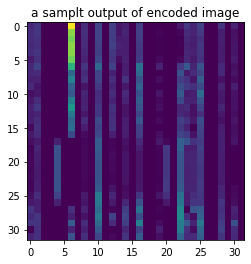

In [10]:
plt.imshow(encoder_output[0][0]) # a channel output shown in plot
plt.title("a samplt output of encoded image")

# Decoding

In [11]:
original_output=decoder.predict(encoder_output) # decoder output back to orig

Text(0.5, 1.0, 'reconstructed image')

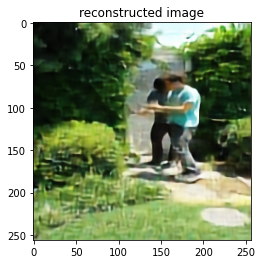

In [12]:
plt.imshow(original_output[0])
plt.title("reconstructed image")